In [1]:
%pylab inline
from CO2_sim_1D import CO2_1D

Populating the interactive namespace from numpy and matplotlib


In [6]:
n=20
x = linspace(0,5000,n)
z = linspace(0,1,n)
np.random.seed(7)
r = ones(n-1) + 0.1*np.random.rand(n-1)
#r[5] = 0.5
sim = CO2_1D(x,z, init_radii=r, 
             Q_w=.2, 
             T_outside=0., 
             D_a=35., D_w=35.,
             adv_disp_stabil_factor=0.5)

In [7]:

#sim.h[0]=1.
sim.calc_flow_depths()
#sim.T_outside = 0
sim.calc_air_flow()
#sim.calc_steady_adv_disp_reaction()
sim.calc_steady_state_transport()

0.7120159334304614
0.7747271853393728
0.6990057721043756
0.6906938917766601
0.6821817307171225
0.6950119823867313
0.6970265082153484
0.7114144189659017
0.706269437114701
0.6968621748849961
0.6921801572275003
0.6863912419103027
0.7014969036601354
0.7105508755430494
0.7056543464997361
0.6849363037385596
0.705277213739869
0.6974082778016992
0.683895117706597
Air discharge =  0.5829433254408319  m^3/s
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation range is set to minimum from table.
Warning! Low PCO2 outside of interpolation ran

In [10]:
#sim.CO2_a
#plot(xmid,sim.CO2_w[1:] - sim.CO2_w[:-1])
#plot(xmid,sim.CO2_a[1:] - sim.CO2_a[:-1])
sim.CO2_a/sim.pCO2_outside

array([  1.00004636,  16.34579881,  32.59464037,  48.28613261,
        63.95878795,  79.6188804 ,  96.54742251, 114.08354481,
       133.05077253, 152.23870744, 171.47495695, 190.92329116,
       210.62082674, 231.94795025, 254.682425  , 277.64580024,
       299.6837128 , 324.17661112, 348.77017881, 372.81251012])

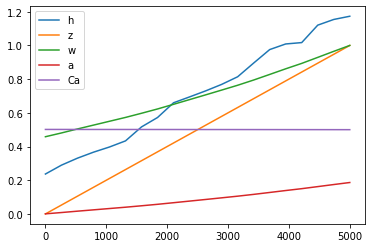

In [8]:
xmid = (x[1:] + x[:-1])/2.
plot(x, sim.h)
plot(x,z)
#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','w','a','Ca'])

Timestep= 1
rel tol CO2_w= 0.005022846926717062   abs_tol_CO2_w= 0.005022846926717062
rel tol CO2_a= 0.003009200941559678   abs_tol_CO2_a= 0.00270828084740371
Timestep= 2
rel tol CO2_w= 0.004657920073379474   abs_tol_CO2_w= 0.0046345240538540056
rel tol CO2_a= 0.0027682245611030925   abs_tol_CO2_a= 0.0024988992345529315
Timestep= 3
rel tol CO2_w= 0.00431792109887435   abs_tol_CO2_w= 0.004276221332957686
rel tol CO2_a= 0.002547146444352145   abs_tol_CO2_a= 0.002305695250147788
Timestep= 4
rel tol CO2_w= 0.004001362079581644   abs_tol_CO2_w= 0.003945608731665939
rel tol CO2_a= 0.0023441645010853908   abs_tol_CO2_a= 0.002127359466631451
Timestep= 5
rel tol CO2_w= 0.003706778385554377   abs_tol_CO2_w= 0.003640504149569068
rel tol CO2_a= 0.002157414242755836   abs_tol_CO2_a= 0.001962470798338556
Timestep= 6
rel tol CO2_w= 0.003432664007978143   abs_tol_CO2_w= 0.0033587940904937774
rel tol CO2_a= 0.0019844647768609397   abs_tol_CO2_a= 0.0018090434597485272
Timestep= 7
rel tol CO2_w= 0.003177

rel tol CO2_w= 2.06936038940995e-06   abs_tol_CO2_w= 1.9469598628862883e-06
rel tol CO2_a= 3.3328367661902774e-07   abs_tol_CO2_a= 3.0635555303692996e-07
rel tol Ca= 1.6380381958938483e-05   abs_tol_Ca= 8.207517375291573e-06
Timestep= 58
rel tol CO2_w= 1.0784001364504921e-06   abs_tol_CO2_w= 1.01461178425577e-06
rel tol CO2_a= 1.6516823838984197e-07   abs_tol_CO2_a= 1.5182318757744895e-07
rel tol Ca= 1.0138619876891289e-05   abs_tol_Ca= 5.080117305489296e-06
Timestep= 59
rel tol CO2_w= 5.440290664885254e-07   abs_tol_CO2_w= 5.118486987587545e-07
rel tol CO2_a= 7.933954175043747e-08   abs_tol_CO2_a= 7.292915549239609e-08
rel tol Ca= 6.079667045864383e-06   abs_tol_Ca= 3.046345092516667e-06
Full solution converged: n= 59


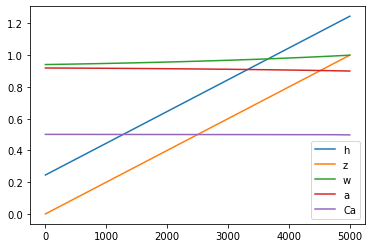

In [11]:
sim.calc_steady_adv_disp_reaction()
plot(x, sim.h)
plot(x,z)
#plot(xmid,sim.fd_mids)
plot(x,sim.CO2_w)
plot(x,sim.CO2_a)
plot(x,sim.Ca)
legend(['h','z','w','a','Ca'])

In [16]:
from olm.calcite import concCaEqFromPCO2, createPalmerInterpolationFunctions, palmerRate, calc_K_H,\
                        solutionFromCaPCO2, palmerFromSolution


K_w = sim.gas_transf_vel*sim.W/sim.A_w
K_a = sim.gas_transf_vel*sim.W/sim.A_a
#Loop backwards through concentration arrays
F = np.zeros(sim.n_nodes - 1)

g=9.8#m/s^2
rho_limestone = 2.6#g/cm^3
g_mol_CaCO3 = 100.09
secs_per_year =  3.154e7
secs_per_hour = 60.*60.


mm_yr_to_mols_sec = 100.*rho_limestone/g_mol_CaCO3/secs_per_year/100./(sim.D_H_w/2.)

for i in np.arange(sim.n_nodes-1, 0, -1):
    this_CO2_w = sim.CO2_w[i]*sim.pCO2_high
    this_CO2_a = sim.CO2_a[i]*sim.pCO2_high
    this_Ca = sim.Ca[i]*sim.Ca_eq_0
    sol = solutionFromCaPCO2(this_Ca, this_CO2_w, T_C=sim.T_cave)
    F[i-1] = palmerFromSolution(sol, PCO2=this_CO2_w)
    R = F[i-1]*mm_yr_to_mols_sec[i-1]
    R_CO2 = R/sim.K_H
    dCO2_a = sim.L_arr[i-1]*K_a[i-1]/sim.V_a[i-1]*(this_CO2_w - this_CO2_a)
    dCO2_w = -sim.L_arr[i-1]*K_w[i-1]/sim.V_w[i-1]*(this_CO2_w - this_CO2_a) - R_CO2/sim.V_w[i-1]
    dCa = sim.L_arr[i-1]*R/sim.V_w[i-1]
    sim.CO2_a[i-1] = sim.pCO2_high*(this_CO2_a + dCO2_a)
    sim.CO2_w[i-1] = sim.pCO2_high*(this_CO2_w + dCO2_w)
    sim.Ca[i-1] = sim.Ca_eq_0*(this_Ca + dCa)
    print(asdf)
    

NameError: name 'asdf' is not defined

In [ ]:
dt_stab[1:dt_stab.size]

In [ ]:
diff_bnd=0
sim.Lambda_w*(sim.CO2_a[1:] - sim.CO2_w[1:])

In [ ]:
diff_bnd=0
diff_bnd2=1

V_w = sim.V_w
V_w_mean = sim.V_w_mean
dx = sim.dx_ad
dt = sim.dt_ad
CO2_w = sim.CO2_w
CO2_a = sim.CO2_a
print((1./dt -(np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2.*dx))*CO2_w[diff_bnd])

print(((np.sign(V_w[0])*V_w[diff_bnd]/V_w_mean)/(2*dx))*CO2_w[diff_bnd2])

In [ ]:
sim.bCO2_w

In [ ]:
np.sign(V_w[0])*(V_w[diff_bnd]/V_w_mean)

In [ ]:
V_w_mean